In [100]:
!pip install --upgrade sympy
    
#PELASE ASSURE YOU HAVE SYMPY VERSION 1.8 OR ABOVE INSTALLED ON YOUR MACHINCE ELSE YOU WILL BE GETTING REVERSED SFD & BMD.

Requirement already up-to-date: sympy in c:\users\shashank\anaconda3\lib\site-packages (1.8)

**LOADING FUNCTION** <img src="BasePlate_SingularityFunctions_032120.png" width=800 height=800 />


**<h4>Distribution function q(x), we can integrate to get the shear V(x) and the
moment M(x) functions.<h4>**<br/>
$V(x) = -$$\int q(x) + C1$<br/>
<br/>
$M(x) = -$$\int V(x) + C1<X>^0 + C2$


**SIGN CONVENTION :**<img src="New Microsoft Word Document.jpg" width=800 height=800 />

In [101]:
#@title
from sympy import * #importing all modules from sympy
from sympy.physics.continuum_mechanics.beam import Beam #importing beam modules from sympy
E, I = symbols('E, I') 

    
def point_load():#function to add point load in KN dist measured from left hand side
    value=float(input("Enter load in KN \nDOWNWARD= POSITIVE\nUPWARD = NEGATIVE:\n "))
    pos=float(input("Enter the position in m measured from left : "))
    b.apply_load(value,pos,-1,end=None)
    
def moment():#function to add moment in KN-m dist measured from left hand side
    value=float(input("Enter moment in KN-m \nCLOCKWISE = NEGATIVE \n ANTI-CLOCKWISE = POSITIVE:\n "))
    pos=float(input("Enter the position in m measured from left: "))
    b.apply_load(value,pos,-2,end=None)
def UDL():#function to add UDL in KN/m dist measured from left hand side
    value=float(input("Enter load in KN/m \nDOWNWARD= POSITIVE\nUPWARD = NEGATIVE:\n "))
    pos1=float(input("Enter the starting point in m measured from left: "))
    pos2=float(input("Enter the ending point in m measured from left: "))
    b.apply_load(value,pos1,0,end=pos2)
    
def UVL():#function to add UVL in KN/m dist measured from left hand side
    value1=float(input("Enter staring load in KN/m \nDOWNWARD= POSITIVE\nUPWARD = NEGATIVE:\n :  "))
    value2=float(input("Enter ending load in KN/m \nDOWNWARD= POSITIVE\nUPWARD = NEGATIVE:\n : "))    
    pos1=float(input("Enter the starting point in m measured from left: "))
    pos2=float(input("Enter the ending point in m measured from left: "))
    
    if (value1>0):#checking if the load is trapezoidal or triangular load then converting the trapezoidal load in to a UDL+triangular load
        b.apply_load(value1,pos1,0,end=pos2)
        
        
        value2=value2-value1
        value1=0
        slope=value2/(pos2-pos1)
        b.apply_load(slope,pos1,1,end=pos2)
        
        #b.apply_load(1, pos1, 1, end=6)
    else:
        slope=value2/(pos2-pos1)
        b.apply_load(slope,pos1,1,end=pos2)
        
#Functions to add supports and location  measured from left       
def fixed(loc):
    b.apply_support(loc,type='fixed')
    
def pin(loc):
    b.apply_support(loc,type='pin')

def roller(loc):
    b.apply_support(loc,type='roller')

reac_counter=0    
    
    
    
    
    
    

In [102]:
#@title
l=value=float(input("Enter the length of the beam in m:\n"))
b = Beam(l, E, I)

npl=int(input("Enter the number of point loads:\n"))
for i in range(npl):
    point_load()
    
    
nm=int(input("Enter the number of moment:\n"))
for i in range(nm):
    moment()
    
    
udl=int(input("Enter the number of UDLs:\n"))
for i in range(udl):
    UDL()
    
uvl=int(input("Enter the number of UVLs:\n"))
for i in range(uvl):
    UVL()
    
fs=int(input("Enter the number of fixed supports:\n"))
reac_counter=reac_counter+(2*fs)
for i in range(fs):
    loc=float(input("Enter the location in m:\n"))
    fixed(loc)
    
    
ps=int(input("Enter the number of pin supports:\n"))
reac_counter=reac_counter+ps
for i in range(ps):
    loc=float(input("Enter the location in m:\n"))
    pin(loc)
    
rs=int(input("Enter the number of roller supports:\n"))
reac_counter=reac_counter+rs
for i in range(rs):
    loc=float(input("Enter the location in m:\n"))
    roller(loc)
    

    

Enter the length of the beam in m:
5
Enter the number of point loads:
2
Enter load in KN 
DOWNWARD= POSITIVE
UPWARD = NEGATIVE:
 30
Enter the position in m measured from left : 2.5
Enter load in KN 
DOWNWARD= POSITIVE
UPWARD = NEGATIVE:
 30
Enter the position in m measured from left : 3.25
Enter the number of moment:
0
Enter the number of UDLs:
0
Enter the number of UVLs:
0
Enter the number of fixed supports:
0
Enter the number of pin supports:
6
Enter the location in m:
0
Enter the location in m:
.75
Enter the location in m:
1.5
Enter the location in m:
2.25
Enter the location in m:
3.5
Enter the location in m:
4
Enter the number of roller supports:
0


BEAM DIAGRAM


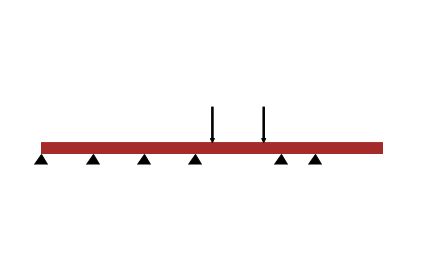

In [103]:
print("BEAM DIAGRAM")
p = b.draw()
p.show()

In [104]:
print("FINAL LOAD EQUATION")
b.load

FINAL LOAD EQUATION


R_0.0*SingularityFunction(x, 0.0, -1) + R_0.750000000000000*SingularityFunction(x, 0.75, -1) + R_1.50000000000000*SingularityFunction(x, 1.5, -1) + R_2.25000000000000*SingularityFunction(x, 2.25, -1) + R_3.50000000000000*SingularityFunction(x, 3.5, -1) + R_4.00000000000000*SingularityFunction(x, 4.0, -1) + 30.0*SingularityFunction(x, 2.5, -1) + 30.0*SingularityFunction(x, 3.25, -1)

In [105]:
#@title
#extraction of reaction forces symbols from list of tuples of applied loads.
n=reac_counter#number of reaction forces
listreac = b.applied_loads[-n:]
reac = []

for a_tuple in listreac:
    reac.append(a_tuple[0])

In [106]:
reac

[R_0.0,
 R_0.750000000000000,
 R_1.50000000000000,
 R_2.25000000000000,
 R_3.50000000000000,
 R_4.00000000000000]

In [107]:
len(reac)

6

In [108]:
#@title
#assigning variables for the reaction forces depending upon the number of reaction forces assuming there are atmost two supports
r1=''
r2=''
r3=''
r4=''
r5=''

n_reac=len(reac)

if (n_reac==1):
    r1=str(reac[0])
    #r2=str(reac[1])
    R_0=symbols(r1)
    #R_2= symbols(r2)
    b.solve_for_reaction_loads(R_0)
    print(b.reaction_loads)


if (n_reac==2):
    r1=str(reac[0])
    r2=str(reac[1])
    R_0=symbols(r1)
    R_1= symbols(r2)
    b.solve_for_reaction_loads(R_0,R_1)
    print(b.reaction_loads)
    

    
if (n_reac==3):
    r1=str(reac[0])
    r2=str(reac[1])
    r3=str(reac[2])
    R_0=symbols(r1)
    R_1= symbols(r2)
    R_2=symbols(r3)
    b.solve_for_reaction_loads(R_0,R_1,R_2)
    print(b.reaction_loads)
    
if (n_reac==4):
    r1=str(reac[0])
    r2=str(reac[1])
    r3=str(reac[2])
    r4=str(reac[3])
    R_0=symbols(r1)
    R_1= symbols(r2)
    R_2=symbols(r3)
    R_3=symbols(r4)
    b.solve_for_reaction_loads(R_0,R_1,R_2,R_3)
    print(b.reaction_loads)
    
if (n_reac==5):
    r1=str(reac[0])
    r2=str(reac[1])
    r3=str(reac[2])
    r4=str(reac[3])
    r5=str(reac[4])
    R_0=symbols(r1)
    R_1= symbols(r2)
    R_2=symbols(r3)
    R_3=symbols(r4)
    R_4=symbols(r5)
    b.solve_for_reaction_loads(R_0,R_1,R_2,R_3,R_4)
    print(b.reaction_loads)
    
if (n_reac==6):
    r1=str(reac[0])
    r2=str(reac[1])
    r3=str(reac[2])
    r4=str(reac[3])
    r5=str(reac[4])
    r6=str(reac[5])
    R_0=symbols(r1)
    R_1= symbols(r2)
    R_2=symbols(r3)
    R_3=symbols(r4)
    R_4=symbols(r5)
    R_5=symbols(r6)
    b.solve_for_reaction_loads(R_0,R_1,R_2,R_3,R_4,R_5)
    print(b.reaction_loads)
    
    

#R_0=symbols(r1)
#R_2= symbols(r2)
#b.solve_for_reaction_loads(R_4,R_0)
#b.reaction_loads

{R_0.0: 1.30886259357644, R_0.750000000000000: -6.71921033566775, R_1.50000000000000: 14.9754890123159, R_2.25000000000000: -40.6648605409322, R_3.50000000000000: -38.8222168558341, R_4.00000000000000: 9.21516541898092}


In [109]:
b.reaction_loads

{R_0.0: 1.30886259357644,
 R_0.750000000000000: -6.71921033566775,
 R_1.50000000000000: 14.9754890123159,
 R_2.25000000000000: -40.6648605409322,
 R_3.50000000000000: -38.8222168558341,
 R_4.00000000000000: 9.21516541898092}

In [110]:
print("FINAL LOAD EQUATION")
b.load


FINAL LOAD EQUATION


1.30886259357644*SingularityFunction(x, 0.0, -1) - 6.71921033566775*SingularityFunction(x, 0.75, -1) + 14.9754890123159*SingularityFunction(x, 1.5, -1) - 40.6648605409322*SingularityFunction(x, 2.25, -1) + 30.0*SingularityFunction(x, 2.5, -1) + 30.0*SingularityFunction(x, 3.25, -1) - 38.8222168558341*SingularityFunction(x, 3.5, -1) + 9.21516541898092*SingularityFunction(x, 4.0, -1)

In [111]:
print("SHEAR FORCE EQUATION")
b.shear_force()


SHEAR FORCE EQUATION


-1.30886259357644*SingularityFunction(x, 0.0, 0) + 6.71921033566775*SingularityFunction(x, 0.75, 0) - 14.9754890123159*SingularityFunction(x, 1.5, 0) + 40.6648605409322*SingularityFunction(x, 2.25, 0) - 30.0*SingularityFunction(x, 2.5, 0) - 30.0*SingularityFunction(x, 3.25, 0) + 38.8222168558341*SingularityFunction(x, 3.5, 0) - 9.21516541898092*SingularityFunction(x, 4.0, 0)

In [112]:
print("BENDING MOMENT EQUATION")
b.bending_moment()

BENDING MOMENT EQUATION


-1.30886259357644*SingularityFunction(x, 0.0, 1) + 6.71921033566775*SingularityFunction(x, 0.75, 1) - 14.9754890123159*SingularityFunction(x, 1.5, 1) + 40.6648605409322*SingularityFunction(x, 2.25, 1) - 30.0*SingularityFunction(x, 2.5, 1) - 30.0*SingularityFunction(x, 3.25, 1) + 38.8222168558341*SingularityFunction(x, 3.5, 1) - 9.21516541898092*SingularityFunction(x, 4.0, 1)

SHEAR FORCE DIAGRAM


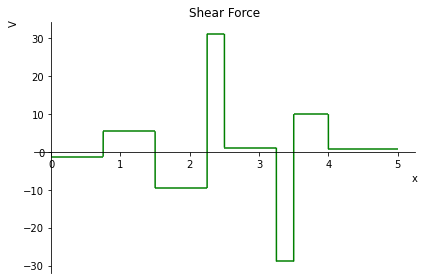

In [113]:
print("SHEAR FORCE DIAGRAM")
b.plot_shear_force()



BENDING MOMENT DIAGRAM


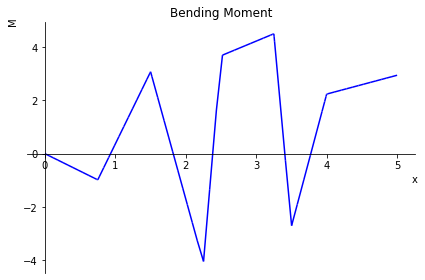

In [114]:
print('BENDING MOMENT DIAGRAM')
b.plot_bending_moment()